In [76]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
!pip install contractions
import contractions

In [77]:
dataset = pd.read_excel("DataTeks.xlsx")
dataset

,Lingkungan Sosial Media Toxic,Label1
0,"Setuju, karena menurut saya banyak orang di so...",P
1,"setuju , karena banyaknya orang orang yang men...",P
2,tidak setuju karena media sosial pribadi saya ...,N
3,tidak setuju,N
4,"Tidak setuju, karna rata2 teman media sosial s...",N
...,...,...
61,Saya setuju karena banyak sekali kasus akibat ...,P
62,Setuju karena dengan kita bermain media sosial...,P
63,"Saya pribadi setuju, karena dalam media sosial...",P
64,"Tidak setuju, penggunaan media sosial bergantu...",N


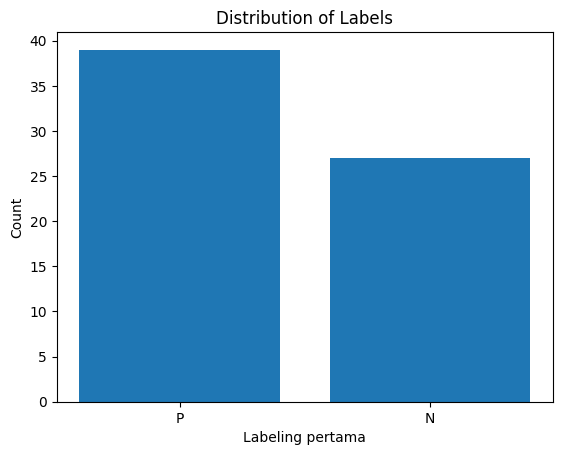

In [78]:
import matplotlib.pyplot as plt

# Menghitung jumlah setiap label
label_counts = dataset['Label1'].value_counts()

# Membuat barchart
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Labeling pertama')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()

Preparing Data

In [79]:
dataset

,Lingkungan Sosial Media Toxic,Label1
0,"Setuju, karena menurut saya banyak orang di so...",P
1,"setuju , karena banyaknya orang orang yang men...",P
2,tidak setuju karena media sosial pribadi saya ...,N
3,tidak setuju,N
4,"Tidak setuju, karna rata2 teman media sosial s...",N
...,...,...
61,Saya setuju karena banyak sekali kasus akibat ...,P
62,Setuju karena dengan kita bermain media sosial...,P
63,"Saya pribadi setuju, karena dalam media sosial...",P
64,"Tidak setuju, penggunaan media sosial bergantu...",N


In [80]:
dataset['no_contractions'] = dataset['Lingkungan Sosial Media Toxic'].apply(lambda x: [contractions.fix(word) for word in x.split()])
dataset.head(7)

,Lingkungan Sosial Media Toxic,Label1,no_contractions
0,"Setuju, karena menurut saya banyak orang di so...",P,"[Setuju,, karena, menurut, saya, banyak, orang..."
1,"setuju , karena banyaknya orang orang yang men...",P,"[setuju, ,, karena, banyaknya, orang, orang, y..."
2,tidak setuju karena media sosial pribadi saya ...,N,"[tidak, setuju, karena, media, sosial, pribadi..."
3,tidak setuju,N,"[tidak, setuju]"
4,"Tidak setuju, karna rata2 teman media sosial s...",N,"[Tidak, setuju,, karna, rata2, teman, media, s..."
5,"Tidak setuju,karena dengan adanya medsos dunia...",N,"[Tidak, setuju,karena, dengan, adanya, medsos,..."
6,Tidak. Karena lingkungan di media sosial saya ...,N,"[Tidak., Karena, lingkungan, di, media, sosial..."


In [81]:
dataset['reviews_no_contractions'] = [' '.join(l) for l in dataset['no_contractions']]
dataset.head(7)

,Lingkungan Sosial Media Toxic,Label1,no_contractions,reviews_no_contractions
0,"Setuju, karena menurut saya banyak orang di so...",P,"[Setuju,, karena, menurut, saya, banyak, orang...","Setuju, karena menurut saya banyak orang di so..."
1,"setuju , karena banyaknya orang orang yang men...",P,"[setuju, ,, karena, banyaknya, orang, orang, y...","setuju , karena banyaknya orang orang yang men..."
2,tidak setuju karena media sosial pribadi saya ...,N,"[tidak, setuju, karena, media, sosial, pribadi...",tidak setuju karena media sosial pribadi saya ...
3,tidak setuju,N,"[tidak, setuju]",tidak setuju
4,"Tidak setuju, karna rata2 teman media sosial s...",N,"[Tidak, setuju,, karna, rata2, teman, media, s...","Tidak setuju, karna rata2 teman media sosial s..."
5,"Tidak setuju,karena dengan adanya medsos dunia...",N,"[Tidak, setuju,karena, dengan, adanya, medsos,...","Tidak setuju,karena dengan adanya medsos dunia..."
6,Tidak. Karena lingkungan di media sosial saya ...,N,"[Tidak., Karena, lingkungan, di, media, sosial...",Tidak. Karena lingkungan di media sosial saya ...


In [82]:
dataset['reviews_tokenized'] = dataset['reviews_no_contractions'].apply(word_tokenize)
dataset.head()

,Lingkungan Sosial Media Toxic,Label1,no_contractions,reviews_no_contractions,reviews_tokenized
0,"Setuju, karena menurut saya banyak orang di so...",P,"[Setuju,, karena, menurut, saya, banyak, orang...","Setuju, karena menurut saya banyak orang di so...","[Setuju, ,, karena, menurut, saya, banyak, ora..."
1,"setuju , karena banyaknya orang orang yang men...",P,"[setuju, ,, karena, banyaknya, orang, orang, y...","setuju , karena banyaknya orang orang yang men...","[setuju, ,, karena, banyaknya, orang, orang, y..."
2,tidak setuju karena media sosial pribadi saya ...,N,"[tidak, setuju, karena, media, sosial, pribadi...",tidak setuju karena media sosial pribadi saya ...,"[tidak, setuju, karena, media, sosial, pribadi..."
3,tidak setuju,N,"[tidak, setuju]",tidak setuju,"[tidak, setuju]"
4,"Tidak setuju, karna rata2 teman media sosial s...",N,"[Tidak, setuju,, karna, rata2, teman, media, s...","Tidak setuju, karna rata2 teman media sosial s...","[Tidak, setuju, ,, karna, rata2, teman, media,..."


Convert to Lowercase

Tokenizing

In [83]:
  >>> import nltk
  >>> nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [84]:
dataset['reviews_lower'] = dataset['reviews_tokenized'].apply(lambda x: [word.lower() for word in x])
dataset.head()

,Lingkungan Sosial Media Toxic,Label1,no_contractions,reviews_no_contractions,reviews_tokenized,reviews_lower
0,"Setuju, karena menurut saya banyak orang di so...",P,"[Setuju,, karena, menurut, saya, banyak, orang...","Setuju, karena menurut saya banyak orang di so...","[Setuju, ,, karena, menurut, saya, banyak, ora...","[setuju, ,, karena, menurut, saya, banyak, ora..."
1,"setuju , karena banyaknya orang orang yang men...",P,"[setuju, ,, karena, banyaknya, orang, orang, y...","setuju , karena banyaknya orang orang yang men...","[setuju, ,, karena, banyaknya, orang, orang, y...","[setuju, ,, karena, banyaknya, orang, orang, y..."
2,tidak setuju karena media sosial pribadi saya ...,N,"[tidak, setuju, karena, media, sosial, pribadi...",tidak setuju karena media sosial pribadi saya ...,"[tidak, setuju, karena, media, sosial, pribadi...","[tidak, setuju, karena, media, sosial, pribadi..."
3,tidak setuju,N,"[tidak, setuju]",tidak setuju,"[tidak, setuju]","[tidak, setuju]"
4,"Tidak setuju, karna rata2 teman media sosial s...",N,"[Tidak, setuju,, karna, rata2, teman, media, s...","Tidak setuju, karna rata2 teman media sosial s...","[Tidak, setuju, ,, karna, rata2, teman, media,...","[tidak, setuju, ,, karna, rata2, teman, media,..."


Remove Punctuation

In [85]:
punctuations = string.punctuation
dataset['reviews_no_punctuation'] = dataset['reviews_lower'].apply(lambda x: [word for word in x if word not in punctuations])
dataset.head()

,Lingkungan Sosial Media Toxic,Label1,no_contractions,reviews_no_contractions,reviews_tokenized,reviews_lower,reviews_no_punctuation
0,"Setuju, karena menurut saya banyak orang di so...",P,"[Setuju,, karena, menurut, saya, banyak, orang...","Setuju, karena menurut saya banyak orang di so...","[Setuju, ,, karena, menurut, saya, banyak, ora...","[setuju, ,, karena, menurut, saya, banyak, ora...","[setuju, karena, menurut, saya, banyak, orang,..."
1,"setuju , karena banyaknya orang orang yang men...",P,"[setuju, ,, karena, banyaknya, orang, orang, y...","setuju , karena banyaknya orang orang yang men...","[setuju, ,, karena, banyaknya, orang, orang, y...","[setuju, ,, karena, banyaknya, orang, orang, y...","[setuju, karena, banyaknya, orang, orang, yang..."
2,tidak setuju karena media sosial pribadi saya ...,N,"[tidak, setuju, karena, media, sosial, pribadi...",tidak setuju karena media sosial pribadi saya ...,"[tidak, setuju, karena, media, sosial, pribadi...","[tidak, setuju, karena, media, sosial, pribadi...","[tidak, setuju, karena, media, sosial, pribadi..."
3,tidak setuju,N,"[tidak, setuju]",tidak setuju,"[tidak, setuju]","[tidak, setuju]","[tidak, setuju]"
4,"Tidak setuju, karna rata2 teman media sosial s...",N,"[Tidak, setuju,, karna, rata2, teman, media, s...","Tidak setuju, karna rata2 teman media sosial s...","[Tidak, setuju, ,, karna, rata2, teman, media,...","[tidak, setuju, ,, karna, rata2, teman, media,...","[tidak, setuju, karna, rata2, teman, media, so..."


Convert back to String

In [86]:
dataset['reviews_cleaned'] = [' '.join(l) for l in dataset['reviews_no_punctuation']]
dataset.head()

,Lingkungan Sosial Media Toxic,Label1,no_contractions,reviews_no_contractions,reviews_tokenized,reviews_lower,reviews_no_punctuation,reviews_cleaned
0,"Setuju, karena menurut saya banyak orang di so...",P,"[Setuju,, karena, menurut, saya, banyak, orang...","Setuju, karena menurut saya banyak orang di so...","[Setuju, ,, karena, menurut, saya, banyak, ora...","[setuju, ,, karena, menurut, saya, banyak, ora...","[setuju, karena, menurut, saya, banyak, orang,...",setuju karena menurut saya banyak orang di sos...
1,"setuju , karena banyaknya orang orang yang men...",P,"[setuju, ,, karena, banyaknya, orang, orang, y...","setuju , karena banyaknya orang orang yang men...","[setuju, ,, karena, banyaknya, orang, orang, y...","[setuju, ,, karena, banyaknya, orang, orang, y...","[setuju, karena, banyaknya, orang, orang, yang...",setuju karena banyaknya orang orang yang mengg...
2,tidak setuju karena media sosial pribadi saya ...,N,"[tidak, setuju, karena, media, sosial, pribadi...",tidak setuju karena media sosial pribadi saya ...,"[tidak, setuju, karena, media, sosial, pribadi...","[tidak, setuju, karena, media, sosial, pribadi...","[tidak, setuju, karena, media, sosial, pribadi...",tidak setuju karena media sosial pribadi saya ...
3,tidak setuju,N,"[tidak, setuju]",tidak setuju,"[tidak, setuju]","[tidak, setuju]","[tidak, setuju]",tidak setuju
4,"Tidak setuju, karna rata2 teman media sosial s...",N,"[Tidak, setuju,, karna, rata2, teman, media, s...","Tidak setuju, karna rata2 teman media sosial s...","[Tidak, setuju, ,, karna, rata2, teman, media,...","[tidak, setuju, ,, karna, rata2, teman, media,...","[tidak, setuju, karna, rata2, teman, media, so...",tidak setuju karna rata2 teman media sosial sa...


Export Cleaned Data

In [87]:
dataset[['Lingkungan Sosial Media Toxic','Label1','reviews_cleaned']].to_csv('cleaned_data.csv',index = False)

Removing Stopwords

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [89]:
dataset1 = pd.read_csv("cleaned_data.csv")
dataset1

,Lingkungan Sosial Media Toxic,Label1,reviews_cleaned
0,"Setuju, karena menurut saya banyak orang di so...",P,setuju karena menurut saya banyak orang di sos...
1,"setuju , karena banyaknya orang orang yang men...",P,setuju karena banyaknya orang orang yang mengg...
2,tidak setuju karena media sosial pribadi saya ...,N,tidak setuju karena media sosial pribadi saya ...
3,tidak setuju,N,tidak setuju
4,"Tidak setuju, karna rata2 teman media sosial s...",N,tidak setuju karna rata2 teman media sosial sa...
...,...,...,...
61,Saya setuju karena banyak sekali kasus akibat ...,P,saya setuju karena banyak sekali kasus akibat ...
62,Setuju karena dengan kita bermain media sosial...,P,setuju karena dengan kita bermain media sosial...
63,"Saya pribadi setuju, karena dalam media sosial...",P,saya pribadi setuju karena dalam media sosial ...
64,"Tidak setuju, penggunaan media sosial bergantu...",N,tidak setuju penggunaan media sosial bergantun...


In [90]:
dataset1['reviews_tokenized'] = dataset1['reviews_cleaned'].apply(word_tokenize)

In [91]:
def combine_words(word_list):
    all_words = []
    for word in word_list:
        all_words += word
    return all_words

In [92]:
def count_topwords(all_words):
    counts = dict()
    for word in all_words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    word_count = pd.DataFrame([counts])
    word_count_transposed = word_count.T.reset_index()
    word_count_transposed.columns = ['words','word_count']
    word_count_sorted = word_count_transposed.sort_values("word_count",ascending = False)
    word_count_sorted
    return word_count_sorted[:20]

In [93]:
reviews = dataset1['reviews_tokenized']
reviews_words =  combine_words(reviews)
reviews_words[:10]

['setuju',
 'karena',
 'menurut',
 'saya',
 'banyak',
 'orang',
 'di',
 'sosial',
 'media',
 'yang']

In [94]:
reviews_topword_count = count_topwords(reviews_words)
reviews_topword_count.head()

,words,word_count
3,saya,76
9,yang,74
7,sosial,59
8,media,56
19,tidak,56


<Axes: xlabel='words', ylabel='word_count'>

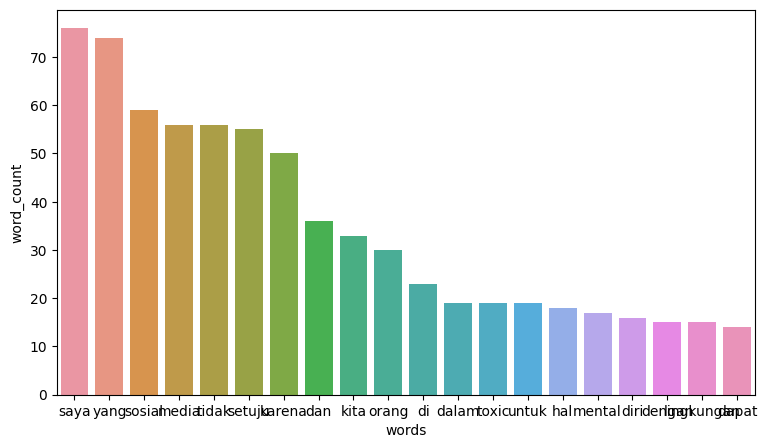

In [95]:
plt.figure(figsize= (9,5))

sns.barplot(data = reviews_topword_count ,x= reviews_topword_count['words'], y= reviews_topword_count['word_count'] )

In [96]:
  >>> import nltk
  >>> nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [97]:
stop_words = set(stopwords.words('indonesian'))
dataset1['reviews_no_stopwords'] = dataset1['reviews_tokenized'].apply(lambda x: [word for word in x if word not in stop_words])
dataset1.head()

,Lingkungan Sosial Media Toxic,Label1,reviews_cleaned,reviews_tokenized,reviews_no_stopwords
0,"Setuju, karena menurut saya banyak orang di so...",P,setuju karena menurut saya banyak orang di sos...,"[setuju, karena, menurut, saya, banyak, orang,...","[setuju, orang, sosial, media, gampang, terhas..."
1,"setuju , karena banyaknya orang orang yang men...",P,setuju karena banyaknya orang orang yang mengg...,"[setuju, karena, banyaknya, orang, orang, yang...","[setuju, banyaknya, orang, orang, media, sosia..."
2,tidak setuju karena media sosial pribadi saya ...,N,tidak setuju karena media sosial pribadi saya ...,"[tidak, setuju, karena, media, sosial, pribadi...","[setuju, media, sosial, pribadi, arah, hal2, p..."
3,tidak setuju,N,tidak setuju,"[tidak, setuju]",[setuju]
4,"Tidak setuju, karna rata2 teman media sosial s...",N,tidak setuju karna rata2 teman media sosial sa...,"[tidak, setuju, karna, rata2, teman, media, so...","[setuju, karna, rata2, teman, media, sosial, t..."


In [98]:
dataset1['reviews_cleaned_stopwords'] = [' '.join(l) for l in dataset1['reviews_no_stopwords']]
dataset1.head()

,Lingkungan Sosial Media Toxic,Label1,reviews_cleaned,reviews_tokenized,reviews_no_stopwords,reviews_cleaned_stopwords
0,"Setuju, karena menurut saya banyak orang di so...",P,setuju karena menurut saya banyak orang di sos...,"[setuju, karena, menurut, saya, banyak, orang,...","[setuju, orang, sosial, media, gampang, terhas...",setuju orang sosial media gampang terhasut omo...
1,"setuju , karena banyaknya orang orang yang men...",P,setuju karena banyaknya orang orang yang mengg...,"[setuju, karena, banyaknya, orang, orang, yang...","[setuju, banyaknya, orang, orang, media, sosia...",setuju banyaknya orang orang media sosial meny...
2,tidak setuju karena media sosial pribadi saya ...,N,tidak setuju karena media sosial pribadi saya ...,"[tidak, setuju, karena, media, sosial, pribadi...","[setuju, media, sosial, pribadi, arah, hal2, p...",setuju media sosial pribadi arah hal2 positif ...
3,tidak setuju,N,tidak setuju,"[tidak, setuju]",[setuju],setuju
4,"Tidak setuju, karna rata2 teman media sosial s...",N,tidak setuju karna rata2 teman media sosial sa...,"[tidak, setuju, karna, rata2, teman, media, so...","[setuju, karna, rata2, teman, media, sosial, t...",setuju karna rata2 teman media sosial teman


In [99]:
reviews_no_stopwords = dataset1['reviews_no_stopwords']
reviews_words =  combine_words(reviews_no_stopwords)
reviews_words[:10]

['setuju',
 'orang',
 'sosial',
 'media',
 'gampang',
 'terhasut',
 'omongan',
 'orang',
 'menyinggung',
 'setuju']

In [100]:
reviews_topword_count = count_topwords(reviews_words)
reviews_topword_count.head()

,words,word_count
2,sosial,59
3,media,56
0,setuju,55
1,orang,30
19,toxic,19


In [101]:
dataset1[['Lingkungan Sosial Media Toxic','Label1',"reviews_cleaned",'reviews_cleaned_stopwords']].to_csv("cleaned_no_stopwords.csv",index = False)

Stemming dan Lemmatization

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [103]:
dataset2 = pd.read_csv("cleaned_no_stopwords.csv")
dataset2

,Lingkungan Sosial Media Toxic,Label1,reviews_cleaned,reviews_cleaned_stopwords
0,"Setuju, karena menurut saya banyak orang di so...",P,setuju karena menurut saya banyak orang di sos...,setuju orang sosial media gampang terhasut omo...
1,"setuju , karena banyaknya orang orang yang men...",P,setuju karena banyaknya orang orang yang mengg...,setuju banyaknya orang orang media sosial meny...
2,tidak setuju karena media sosial pribadi saya ...,N,tidak setuju karena media sosial pribadi saya ...,setuju media sosial pribadi arah hal2 positif ...
3,tidak setuju,N,tidak setuju,setuju
4,"Tidak setuju, karna rata2 teman media sosial s...",N,tidak setuju karna rata2 teman media sosial sa...,setuju karna rata2 teman media sosial teman
...,...,...,...,...
61,Saya setuju karena banyak sekali kasus akibat ...,P,saya setuju karena banyak sekali kasus akibat ...,setuju akibat bebasnya bermedia sosial dunia a...
62,Setuju karena dengan kita bermain media sosial...,P,setuju karena dengan kita bermain media sosial...,setuju bermain media sosial menggangu kesehata...
63,"Saya pribadi setuju, karena dalam media sosial...",P,saya pribadi setuju karena dalam media sosial ...,pribadi setuju media sosial mengontrol perlaku...
64,"Tidak setuju, penggunaan media sosial bergantu...",N,tidak setuju penggunaan media sosial bergantun...,setuju penggunaan media sosial bergantung meng...


Tokenizing

In [104]:
dataset2['reviews_tokenized'] = dataset2['reviews_cleaned_stopwords'].apply(word_tokenize)

Performing Stemming

In [105]:
stemmer = nltk.PorterStemmer()
dataset2['reviews_stemmed_data'] = dataset2['reviews_tokenized'].apply(lambda x: [stemmer.stem(word) for word in x])
dataset2.head()

,Lingkungan Sosial Media Toxic,Label1,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_stemmed_data
0,"Setuju, karena menurut saya banyak orang di so...",P,setuju karena menurut saya banyak orang di sos...,setuju orang sosial media gampang terhasut omo...,"[setuju, orang, sosial, media, gampang, terhas...","[setuju, orang, sosial, media, gampang, terhas..."
1,"setuju , karena banyaknya orang orang yang men...",P,setuju karena banyaknya orang orang yang mengg...,setuju banyaknya orang orang media sosial meny...,"[setuju, banyaknya, orang, orang, media, sosia...","[setuju, banyaknya, orang, orang, media, sosia..."
2,tidak setuju karena media sosial pribadi saya ...,N,tidak setuju karena media sosial pribadi saya ...,setuju media sosial pribadi arah hal2 positif ...,"[setuju, media, sosial, pribadi, arah, hal2, p...","[setuju, media, sosial, pribadi, arah, hal2, p..."
3,tidak setuju,N,tidak setuju,setuju,[setuju],[setuju]
4,"Tidak setuju, karna rata2 teman media sosial s...",N,tidak setuju karna rata2 teman media sosial sa...,setuju karna rata2 teman media sosial teman,"[setuju, karna, rata2, teman, media, sosial, t...","[setuju, karna, rata2, teman, media, sosial, t..."


In [106]:
dataset2['reviews_cleaned_stemmed'] = [' '.join(l) for l in dataset2['reviews_stemmed_data']]
dataset2.head()

,Lingkungan Sosial Media Toxic,Label1,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_stemmed_data,reviews_cleaned_stemmed
0,"Setuju, karena menurut saya banyak orang di so...",P,setuju karena menurut saya banyak orang di sos...,setuju orang sosial media gampang terhasut omo...,"[setuju, orang, sosial, media, gampang, terhas...","[setuju, orang, sosial, media, gampang, terhas...",setuju orang sosial media gampang terhasut omo...
1,"setuju , karena banyaknya orang orang yang men...",P,setuju karena banyaknya orang orang yang mengg...,setuju banyaknya orang orang media sosial meny...,"[setuju, banyaknya, orang, orang, media, sosia...","[setuju, banyaknya, orang, orang, media, sosia...",setuju banyaknya orang orang media sosial meny...
2,tidak setuju karena media sosial pribadi saya ...,N,tidak setuju karena media sosial pribadi saya ...,setuju media sosial pribadi arah hal2 positif ...,"[setuju, media, sosial, pribadi, arah, hal2, p...","[setuju, media, sosial, pribadi, arah, hal2, p...",setuju media sosial pribadi arah hal2 positif ...
3,tidak setuju,N,tidak setuju,setuju,[setuju],[setuju],setuju
4,"Tidak setuju, karna rata2 teman media sosial s...",N,tidak setuju karna rata2 teman media sosial sa...,setuju karna rata2 teman media sosial teman,"[setuju, karna, rata2, teman, media, sosial, t...","[setuju, karna, rata2, teman, media, sosial, t...",setuju karna rata2 teman media sosial teman


Convert Cleaned Setemmed Data

In [107]:
dataset2[['Lingkungan Sosial Media Toxic','Label1','reviews_cleaned_stemmed',"reviews_cleaned"]].to_csv("cleaned_reviews_stemmed.csv",index = False)

Creating Word Cloud

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud

In [109]:
dataset3 = pd.read_csv("cleaned_reviews_stemmed.csv")
dataset3

,Lingkungan Sosial Media Toxic,Label1,reviews_cleaned_stemmed,reviews_cleaned
0,"Setuju, karena menurut saya banyak orang di so...",P,setuju orang sosial media gampang terhasut omo...,setuju karena menurut saya banyak orang di sos...
1,"setuju , karena banyaknya orang orang yang men...",P,setuju banyaknya orang orang media sosial meny...,setuju karena banyaknya orang orang yang mengg...
2,tidak setuju karena media sosial pribadi saya ...,N,setuju media sosial pribadi arah hal2 positif ...,tidak setuju karena media sosial pribadi saya ...
3,tidak setuju,N,setuju,tidak setuju
4,"Tidak setuju, karna rata2 teman media sosial s...",N,setuju karna rata2 teman media sosial teman,tidak setuju karna rata2 teman media sosial sa...
...,...,...,...,...
61,Saya setuju karena banyak sekali kasus akibat ...,P,setuju akibat bebasnya bermedia sosial dunia a...,saya setuju karena banyak sekali kasus akibat ...
62,Setuju karena dengan kita bermain media sosial...,P,setuju bermain media sosial menggangu kesehata...,setuju karena dengan kita bermain media sosial...
63,"Saya pribadi setuju, karena dalam media sosial...",P,pribadi setuju media sosial mengontrol perlaku...,saya pribadi setuju karena dalam media sosial ...
64,"Tidak setuju, penggunaan media sosial bergantu...",N,setuju penggunaan media sosial bergantung meng...,tidak setuju penggunaan media sosial bergantun...


Tokenizing

In [110]:
dataset3['reviews_tokenized'] = dataset3['reviews_cleaned_stemmed'].apply(word_tokenize)

In [111]:
def combine_words(word_list):
    all_words = []
    for word in word_list:
        all_words += word
    return all_words

In [112]:
reviews = dataset3['reviews_tokenized']
reviews_words =  combine_words(reviews)
reviews_words[:10]

['setuju',
 'orang',
 'sosial',
 'media',
 'gampang',
 'terhasut',
 'omongan',
 'orang',
 'menyinggung',
 'setuju']

WordCloud for label P:


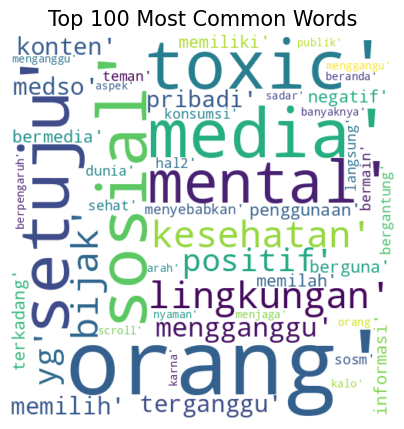

WordCloud for label N:


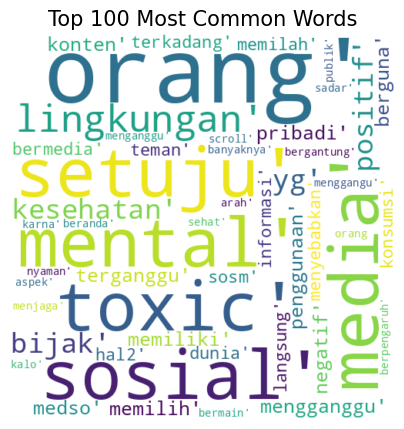

In [124]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fungsi untuk membuat WordCloud
def create_wordcloud(text):
    mostcommon = FreqDist(reviews_words).most_common(50)
    wordcloud = WordCloud(width=500, height=500, background_color='white').generate(str(mostcommon))
    fig = plt.figure(figsize=(5,5), facecolor='white')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title('Top 100 Most Common Words', fontsize=15)
    plt.show()

# Membuat WordCloud untuk setiap label
for label in ['P', 'N']:
    text = ' '.join(dataset3.loc[dataset3['Label1'] == label, 'Lingkungan Sosial Media Toxic'])
    print(f"WordCloud for label {label}:")
    create_wordcloud(text)